In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as s

In [2]:
training_data = pd.DataFrame(data={"x":np.random.normal(loc=65,scale=5,size=1000)})

In [3]:
training_data

,x
0,62.708425
1,54.826270
2,68.687569
3,62.246911
4,69.438128
...,...
995,65.324058
996,61.922896
997,57.062996
998,65.465899


(array([  1.,   4.,   4.,  15.,  27.,  47.,  66.,  95., 143., 155., 124.,
        117.,  89.,  56.,  29.,  16.,   3.,   4.,   4.,   1.]),
 array([48.34729786, 50.09180673, 51.8363156 , 53.58082447, 55.32533334,
        57.06984221, 58.81435108, 60.55885995, 62.30336882, 64.04787769,
        65.79238656, 67.53689543, 69.2814043 , 71.02591317, 72.77042204,
        74.51493091, 76.25943978, 78.00394864, 79.74845751, 81.49296638,
        83.23747525]),
 <BarContainer object of 20 artists>)

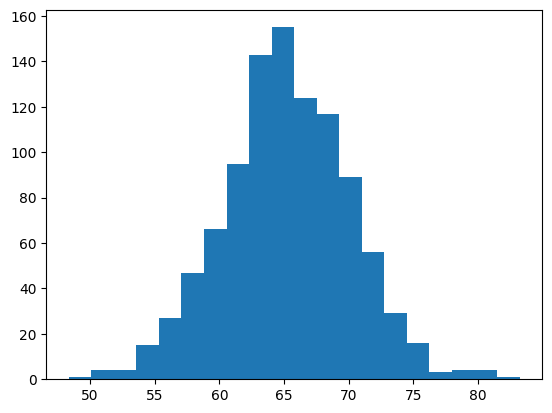

In [4]:
plt.hist(training_data, bins=20)

In [5]:
def negative_log_likelihood(mu, sigma, data):
    n = len(data)
    nll = (n / 2) * np.log(2 * np.pi * sigma**2) + (1 / (2 * sigma**2)) * np.sum((data - mu)**2)
    return nll

In [6]:
mu_values = np.linspace(63, 67, 200)
sigma_values = np.linspace(4, 6, 200)
mu_grid, sigma_grid = np.meshgrid(mu_values, sigma_values)

In [7]:
nll_values = np.zeros_like(mu_grid)

In [8]:
for i in range(mu_grid.shape[0]):
    for j in range(mu_grid.shape[1]):
        nll_values[i, j] = negative_log_likelihood(mu_grid[i, j], sigma_grid[i, j], training_data)

/home/aiml-machine/BCEECE0312_programs/MLE_demo/.venv/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/tmp/ipykernel_1419/1097364582.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  nll_values[i, j] = negative_log_likelihood(mu_grid[i, j], sigma_grid[i, j], training_data)


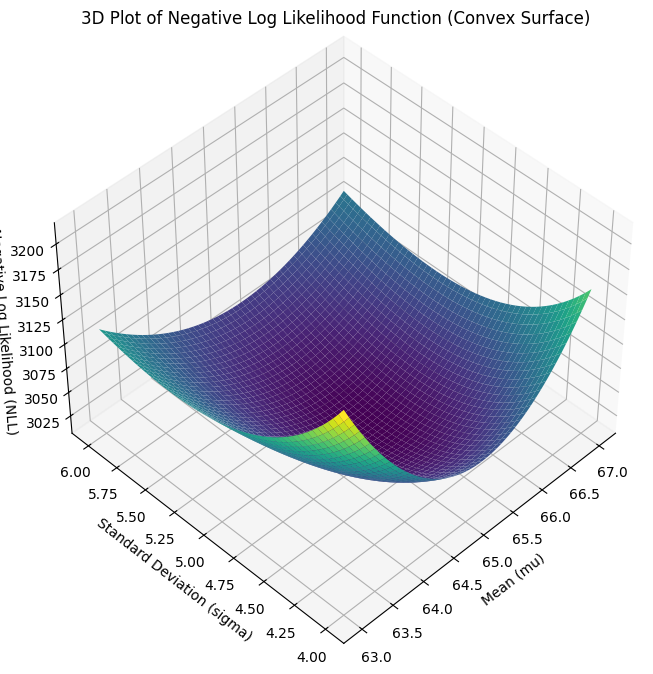

In [9]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(mu_grid, sigma_grid, nll_values, cmap='viridis', edgecolor='none')
ax.set_xlabel('Mean (mu)')
ax.set_ylabel('Standard Deviation (sigma)')
ax.set_zlabel('Negative Log Likelihood (NLL)')
ax.set_title('3D Plot of Negative Log Likelihood Function (Convex Surface)')

# Adjusting the view angle to better visualize the convexity
ax.view_init(elev=45, azim=225)

plt.show()

In [10]:
def del_by_del_nll(mu_initial,sigma_initial):

    del_by_del_mu = -np.mean(training_data - mu_initial)/sigma_initial**2
    del_by_del_sigma = (training_data.shape[0]/sigma_initial) - np.mean(training_data - mu_initial)**2/sigma_initial**3

    return [del_by_del_mu,del_by_del_sigma]

In [11]:
def nll(mu,sigma):

    log_pdf = s.norm.logpdf(training_data,mu,sigma)
    return -np.mean(log_pdf)

In [12]:
epochs = 50
epsilon = 10**(-4)
epoch_counter = 0
mu_initial = 5
sigma_initial = 1
tol = 10**(-3)

while epoch_counter < epochs:

    initial_gradients = del_by_del_nll(mu_initial,sigma_initial)

    mu_final = mu_initial - (epsilon * initial_gradients[0])
    sigma_final = sigma_initial - epsilon * initial_gradients[1]

    nll_initial_value = nll(mu_initial,sigma_initial)
    nll_final_value = nll(mu_final,sigma_final)

    if abs(nll_initial_value - nll_final_value) < tol:
        break

    epoch_counter += 1

    mu_initial = mu_final
    sigma_initial = sigma_final

    print("Epoch # {}, NLL Value = {}".format(epoch_counter,nll_initial_value))

Epoch # 1, NLL Value = 1827.4901712570124
Epoch # 2, NLL Value = 1146.1678645025304
Epoch # 3, NLL Value = 982.8909411757484
Epoch # 4, NLL Value = 889.7316629363773
Epoch # 5, NLL Value = 827.0470678344786
Epoch # 6, NLL Value = 781.1606038081595
Epoch # 7, NLL Value = 745.7702081108376
Epoch # 8, NLL Value = 717.4803485500292
Epoch # 9, NLL Value = 694.2674884931562
Epoch # 10, NLL Value = 674.836722869177
Epoch # 11, NLL Value = 658.3140572197165
Epoch # 12, NLL Value = 644.0845775960123
Epoch # 13, NLL Value = 631.7009810753071
Epoch # 14, NLL Value = 620.8288482835942
Epoch # 15, NLL Value = 611.2123516970898
Epoch # 16, NLL Value = 602.6519300136755
Epoch # 17, NLL Value = 594.9892756705939
Epoch # 18, NLL Value = 588.0969568268902
Epoch # 19, NLL Value = 581.8710691239959
Epoch # 20, NLL Value = 576.225922435102
Epoch # 21, NLL Value = 571.0901272407245
Epoch # 22, NLL Value = 566.4036640512771
Epoch # 23, NLL Value = 562.1156563215853
Epoch # 24, NLL Value = 558.1826553208689
E